In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
books = pd.read_csv('data/books_updated.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name,toread_count,currently_reading
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,"favorites, currentlyreading, youngadult, ficti...",0.0,35418.0
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,"toread, favorites, fantasy, currentlyreading, ...",287.0,44640.0
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,"youngadult, fantasy, favorites, vampires, ya, ...",0.0,240.0
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,"classics, favorites, toread, classic, historic...",50.0,1997.0
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,"classics, favorites, fiction, classic, booksio...",48.0,313.0


### After data integration we have added 3 additional columns: 

#### tag_name: Contains the top 20 tags assigned to each book by different users. This data was extracted by 2 other datasets.
#### toread_count: Contains the total number of times each book was marked as "to read" by different users.
#### currently_reading: Number of users who marked the book as "currently reading"

In [4]:
#removing not required columns
books.drop(['id','book_id','best_book_id','work_id','isbn','isbn13','image_url','small_image_url'], axis=1, inplace=True)

In [5]:
books.head()

,books_count,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,tag_name,toread_count,currently_reading
0,272,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,"favorites, currentlyreading, youngadult, ficti...",0.0,35418.0
1,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,"toread, favorites, fantasy, currentlyreading, ...",287.0,44640.0
2,226,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,"youngadult, fantasy, favorites, vampires, ya, ...",0.0,240.0
3,487,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,"classics, favorites, toread, classic, historic...",50.0,1997.0
4,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,"classics, favorites, fiction, classic, booksio...",48.0,313.0


In [6]:
def plot_dist(df, title):
    plt.figure(figsize=(15,8))
    plt.title(title)
    sns.distplot(df)

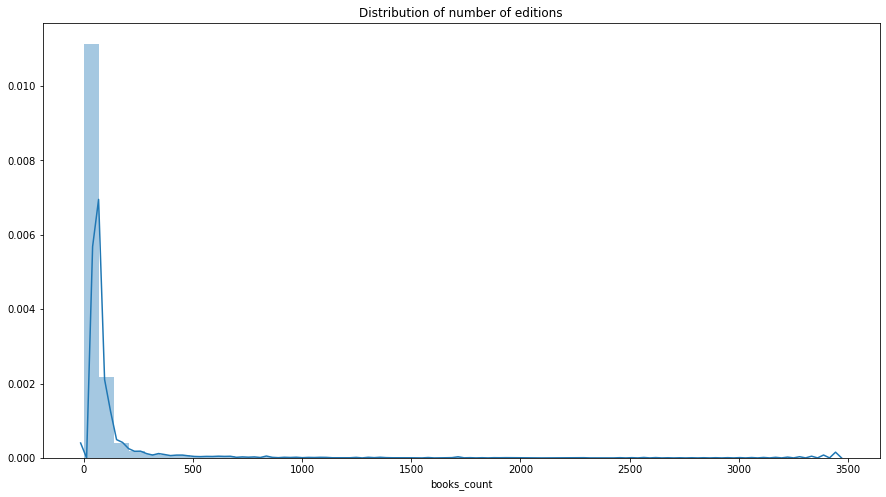

In [7]:
plot_dist(books['books_count'], 'Distribution of number of editions')

### Most books have 1 to 200 editions while some books even have 3000+ editions

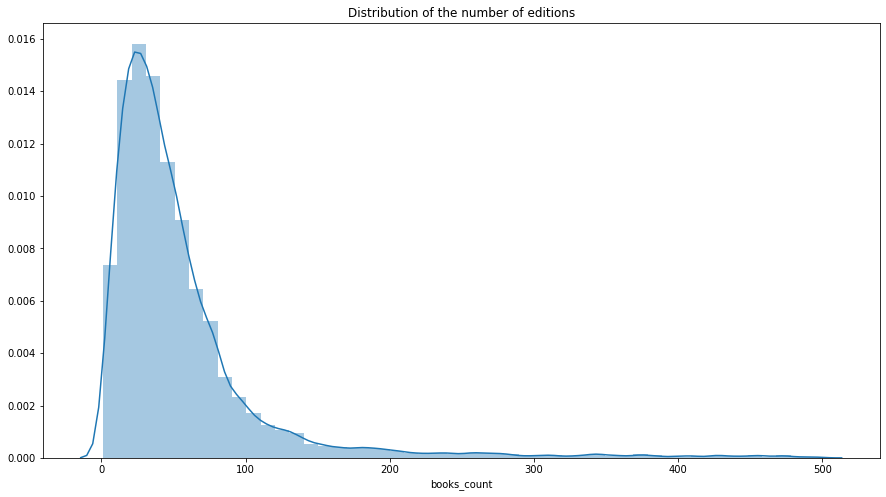

In [8]:
editions = books[books['books_count'] <= 500]['books_count']
plot_dist(editions, 'Distribution of the number of editions')

### The number of editions can be better visualised above

In [9]:
books['original_publication_year'].isnull().sum()

21

In [10]:
books['original_publication_year'].fillna(0, inplace=True)

In [11]:
books['original_publication_year'] = books['original_publication_year'].astype(int)
books['original_publication_year'].isnull().sum()

0

In [12]:
books['original_publication_year'].fillna(0, inplace=True)

In [13]:
books['original_publication_year'].describe()

count    10000.000000
mean      1977.825500
std        177.379886
min      -1750.000000
25%       1990.000000
50%       2004.000000
75%       2011.000000
max       2017.000000
Name: original_publication_year, dtype: float64

### We can see there are year values in negative. The first book ever published was Gutenberg Bible in the year 1455 hence we need to replace these year values with a default value.

In [14]:
books['original_publication_year'] = books['original_publication_year'].apply(lambda year: year if year > 1454 else 0)

In [15]:
books['original_publication_year'].describe()

count    10000.000000
mean      1977.574600
std        171.244427
min          0.000000
25%       1990.000000
50%       2004.000000
75%       2011.000000
max       2017.000000
Name: original_publication_year, dtype: float64

In [16]:
#removing entries for which publication years is made 0
books_year = books[books['original_publication_year'] !=0]['original_publication_year'].value_counts().rename_axis('year').reset_index(name='books_published')
books_year['year'] = books_year['year'].astype(int)
books_year.sort_values('year', inplace=True)

### Trend of number of books published over the years

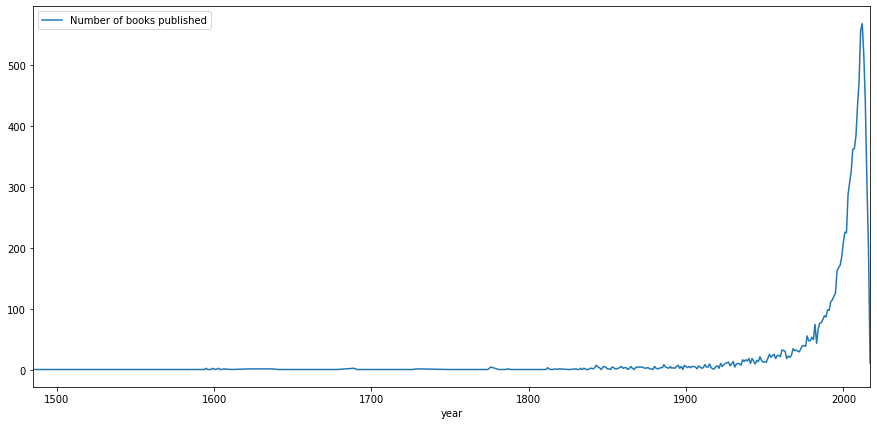

In [17]:
ax = books_year.plot(x='year', y='books_published', figsize=(15,7))

ax.legend(["Number of books published"]);

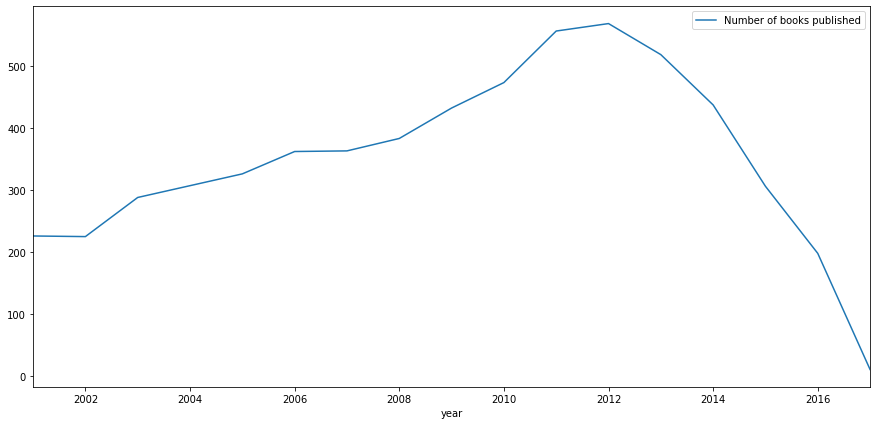

In [18]:
books_year = books_year[books_year['year'] > 2000]
ax = books_year.plot(x='year', y='books_published', figsize=(15,7))
ax.legend(["Number of books published"]);

### Trend of the number of books published since year 2000. We can see a decrease in trend from the year 2012. 

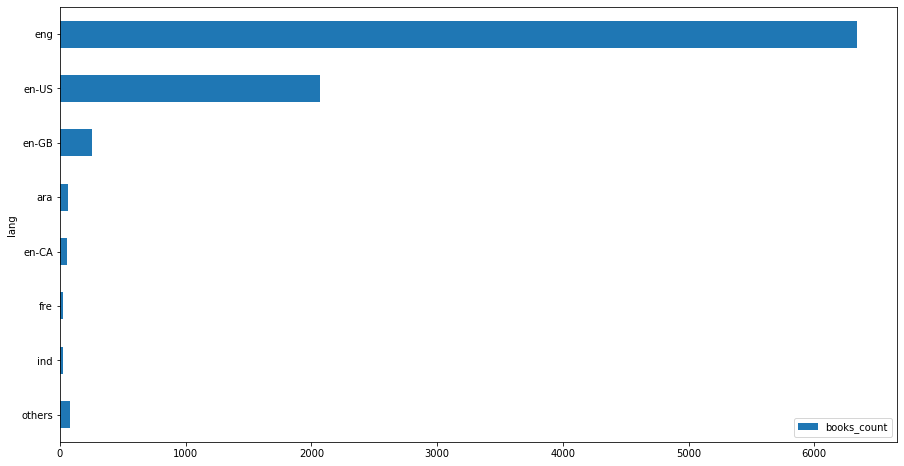

In [19]:
lang = books['language_code'].value_counts().rename_axis('lang').reset_index(name='books_count')
top_lang = ['eng','en-US','en-GB','ara','en-CA','fre','ind','others']
others_sum = 0
for code in lang['lang']:
    if code not in top_lang:
        others_sum = others_sum + lang.loc[lang.lang == code,'books_count'].tolist()[0]
lang.loc[len(lang)] = ['others', others_sum]
lang.append(['others', others_sum])
lang = lang[lang.lang.isin(top_lang)]
ax = lang.plot.barh(x='lang', y='books_count',figsize=(15,8))
ax.invert_yaxis()

### Number of books according to the languages. English tops the list with some other variants of english like eng-US and en-GB

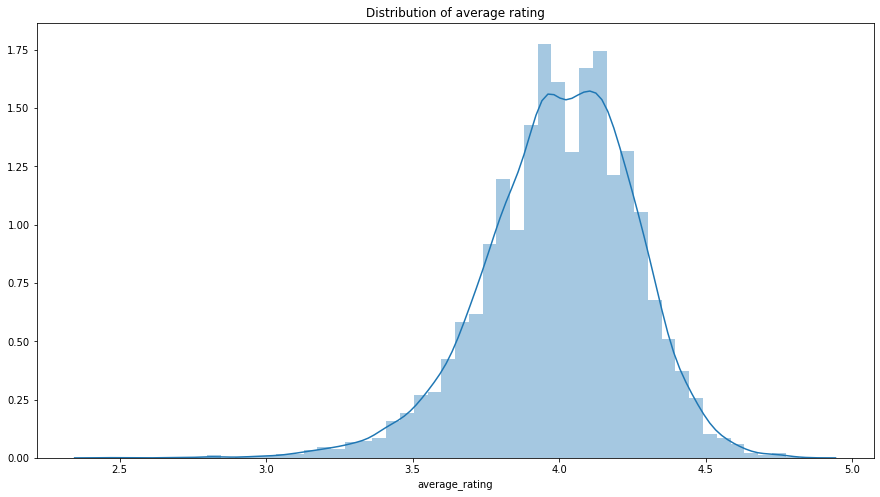

In [20]:
plot_dist(books['average_rating'], 'Distribution of average rating')

### A very high number of books have an average rating of aroung 4

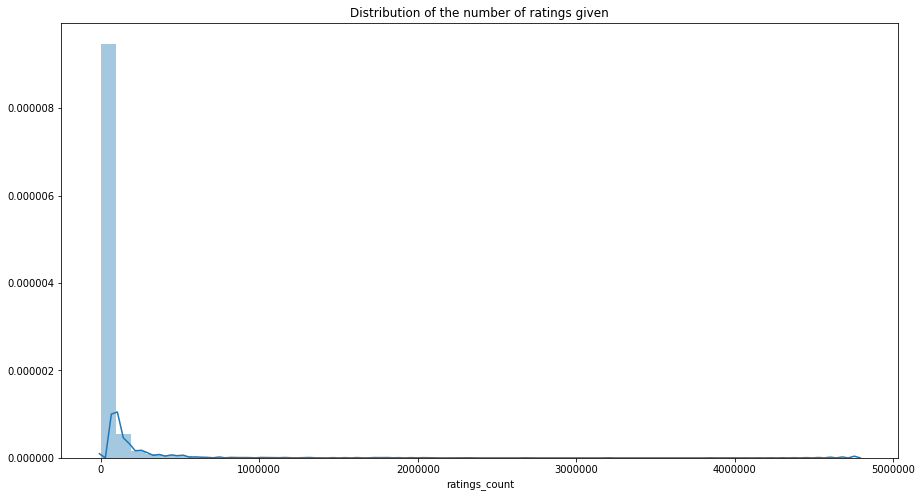

In [21]:
plot_dist(books['ratings_count'], 'Distribution of the number of ratings given')

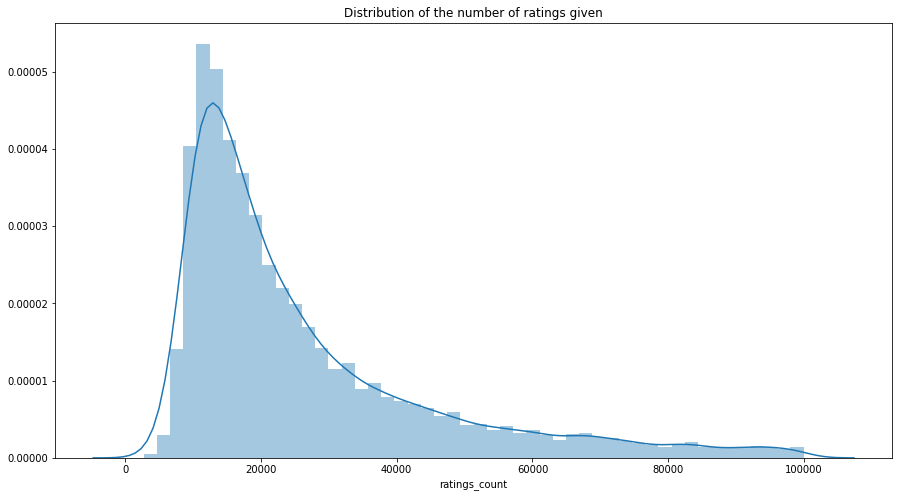

In [22]:
ratings = books[books['ratings_count'] <= 100000]['ratings_count']
plot_dist(ratings, 'Distribution of the number of ratings given')

### Distribution of the number of ratings given by users for books. The number of ratings are as high as 4.5 million and above for some books. Most of the books have a ratings count in the range of 10k to 40k 

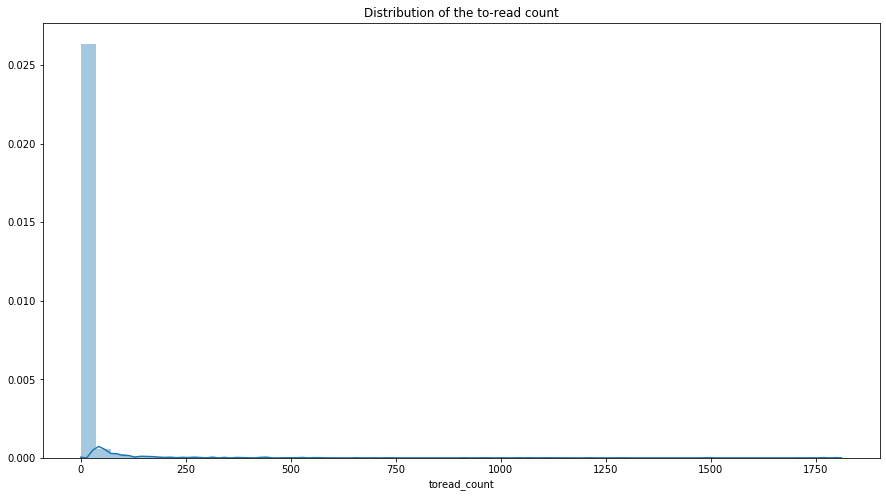

In [23]:
plot_dist(books['toread_count'], 'Distribution of the to-read count')

### A very few number of books are marked as "to read"

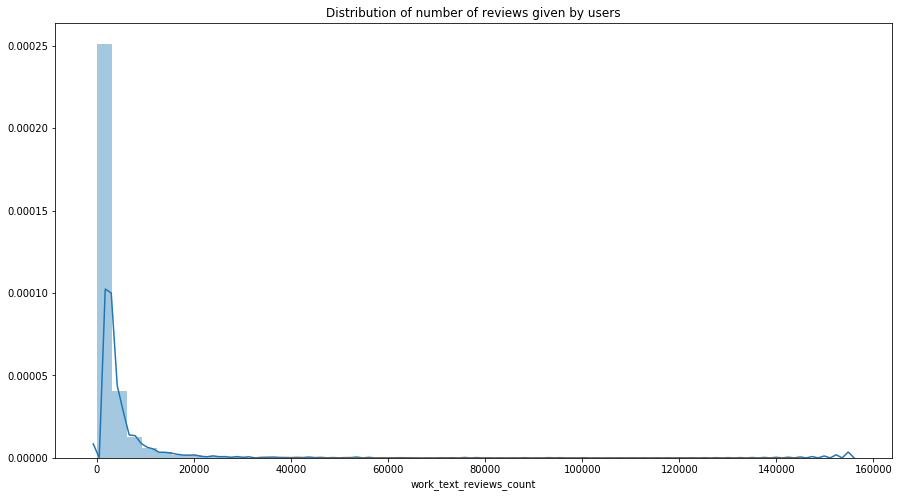

In [24]:
plot_dist(books['work_text_reviews_count'], 'Distribution of number of reviews given by users')

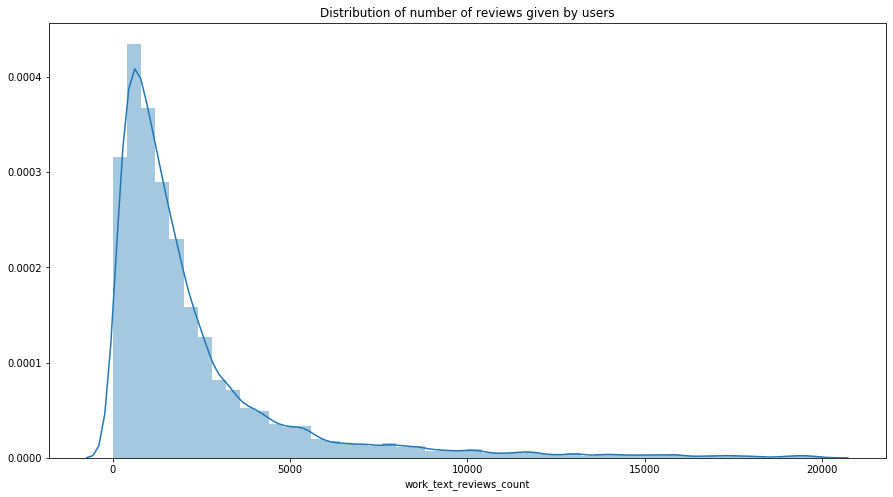

In [25]:
reviews_count = books[books['work_text_reviews_count'] < 20000]['work_text_reviews_count']
plot_dist(reviews_count, 'Distribution of number of reviews given by users')

In [26]:
def plot_scatter(df,col1, col2, title):
    plt.figure(figsize=(15,8))
    plt.title(title)
    plt.scatter(df[col1], df[col2])

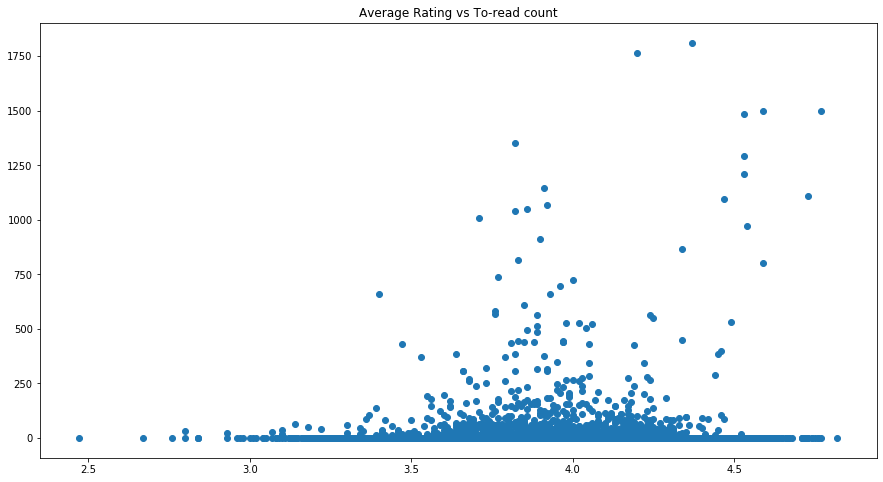

In [27]:
plot_scatter(books, 'average_rating', 'toread_count', 'Average Rating vs To-read count')

### Books that have a high rating of 3.5+ also have a high to read count

In [28]:
top_books = books[['title', 'average_rating']].sort_values('average_rating', ascending=False)

In [29]:
top_books.head(10)

,title,average_rating
3627,The Complete Calvin and Hobbes,4.82
3274,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.77
861,"Words of Radiance (The Stormlight Archive, #2)",4.77
8853,Mark of the Lion Trilogy,4.76
7946,ESV Study Bible,4.76
4482,It's a Magical World: A Calvin and Hobbes Coll...,4.75
6360,There's Treasure Everywhere: A Calvin and Hobb...,4.74
421,"Harry Potter Boxset (Harry Potter, #1-7)",4.74
3752,"Harry Potter Collection (Harry Potter, #1-6)",4.73
6919,The Indispensable Calvin and Hobbes,4.73


### Above is the list of top 10 books according to their average ratings

### We already had the average rating for each book. We can also find the average rating for each author where we can find the average of ratings of all the books each author has published. But that would introduce bias as even a single rating of 4 to a book will be taken equal as thousands of ratings of 4 to a book.

### For example, consider two books A and B such as:

### Book A has millions of 4+ ratings

### Book B has hundreds to thousands of 4+ ratings

### We need to have a fixed measure that differentiates the above books and considers book A to be better than book B. Although there is no such fixed measure for it, we can use the lower range of the 95% confidence interval as our average ratings are normally distributed. We can arrive at a score as follows:

<img src="images/ratings_measure.png" height=150 width=300/>

#### ni is the number of users who rated for the book. If ni is large, the score will come closer to the average rating, but if ni is small, the score will be smaller than the average rating.  It also captures how much the ratings are varying by using the standard deviation.

#### The formula was provided to me by user Nameless at math.stackexchange.com.

<a href=https://math.stackexchange.com/questions/3591814/5-star-average-rating-which-also-considers-number-of-users-rated>Full discussion here</a>

### But first we need to check if we have enough data to calculate standard deviation of ratings for each book

In [30]:
ratings = pd.read_csv('data/ratings.csv')
ratings.drop('user_id', axis=1, inplace=True)
ratings_grouped = ratings.groupby('book_id').agg(['mean', 'count'])
ratings_grouped.head()

rating      
          mean count
book_id             
1         4.24   100
2         4.21   100
3         3.09   100
4         4.46   100
5         3.89   100

### We do not have enough matching data for ratings. 

### For example, the average rating of book id 3 is 4.44 in our original data set as compared to 3.09 to the calculated average from ratings data set

### Even if we calculate standard deviation of the ratings sample given, they are not representing the entire population accurately. Hence it is not possible to compare products based on ratings with the given information we have :(

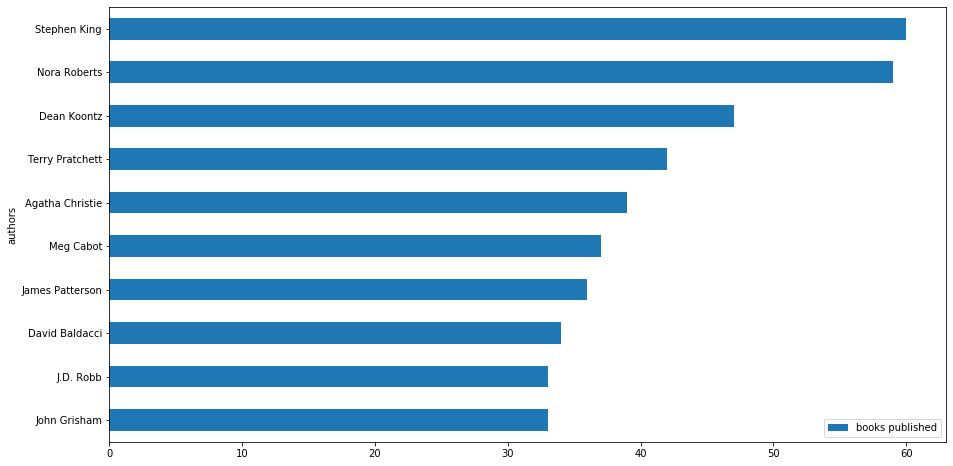

In [31]:
#finding top authors according to the number of books
authors = books['authors'].value_counts().rename_axis('authors').reset_index(name='books published')
top_authors = authors.sort_values('books published', ascending=False)[:10]
ax = top_authors.plot.barh(x='authors', y='books published',figsize=(15,8))
ax.invert_yaxis()

### Above are the top 10 authors according to the number of books published

### We have comma seperated top 5 tags which are assigned the most by users to each book. How to extract the genre of the book from these tags?

In [32]:
#got a list of genres from google
genres = ['romance', 'comedy', 'comic', 'drama', 'detective', 'fable','fairy', 'history', 'horror', 'mystery' 'mythology', 'religion',
          'thriller', 'action', 'classic', 'biography', 'self-help','textbook','speech','essay','memoir', 'fantasy', 
          'adventure', 'psychology', 'music', 'historicalfiction', 'economics', 'mathematics', 'statistics', 'sociology', 'climate', 'crime', 'economics', 'adventure', 'autobiography', 'science', 
          'technology', 'reference', 'realistic' ,'suspense' ,'humor', 'love', 'satire', 'anthology', 'legend', 'poems', 'dystopia'
         'newpaper', 'play', 'western', 'dictionary', 'haiku', 'young', 'children', 'finance', 'adult', 'erotic', 'journal', 'audio'
         , 'fiction']

In [33]:
books['tag_name'].isnull().sum()

0

In [34]:
for g in genres:
    if g in books['tag_name'][0]:
        final = g
        break
final

'romance'

In [35]:
books['tag_name'][91]

'toread, nonfiction, science, currentlyreading, psychology, owned, sociology, audiobook, booksiown, economics, politics, bookclub, audiobooks, finance, library, audio, socialscience, default, toreadnonfiction, economy'

In [36]:
book_genre = []
for index, row in books.iterrows():
    if any(word in row['tag_name'] for word in genres):
        for g in genres:
            if g in row['tag_name']:
                book_genre.append(g)
                break
    else:
        book_genre.append('unknown')
books['Genre'] = book_genre

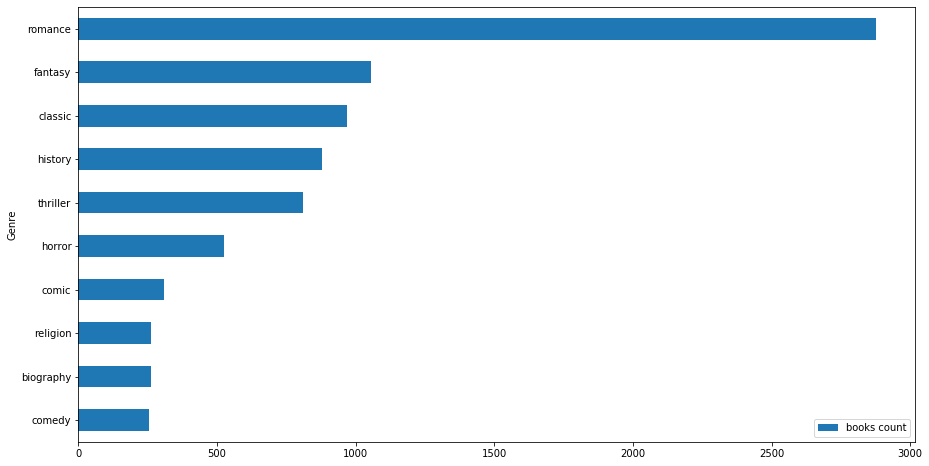

In [37]:
genres = books['Genre'].value_counts().rename_axis('Genre').reset_index(name='books count')
top_genres = genres.sort_values('books count', ascending=False)[:10]
ax = top_genres.plot.barh(x='Genre', y='books count',figsize=(15,8))
ax.invert_yaxis()

### Some of the top genres include romance, fantasy, classic and so on...

In [38]:
top_current = books[['title', 'currently_reading']].sort_values('currently_reading', ascending=False)

In [39]:
top_current.head(10)

,title,currently_reading
4160,James Potter and the Hall of Elders' Crossing ...,77785.0
108,Les Misérables,64311.0
118,The Handmaid's Tale,47919.0
1,Harry Potter and the Sorcerer's Stone (Harry P...,44640.0
142,All the Light We Cannot See,40187.0
94,The Picture of Dorian Gray,39631.0
0,"The Hunger Games (The Hunger Games, #1)",35418.0
82,A Tale of Two Cities,33064.0
109,"A Clash of Kings (A Song of Ice and Fire, #2)",30292.0
96,Dracula,28995.0


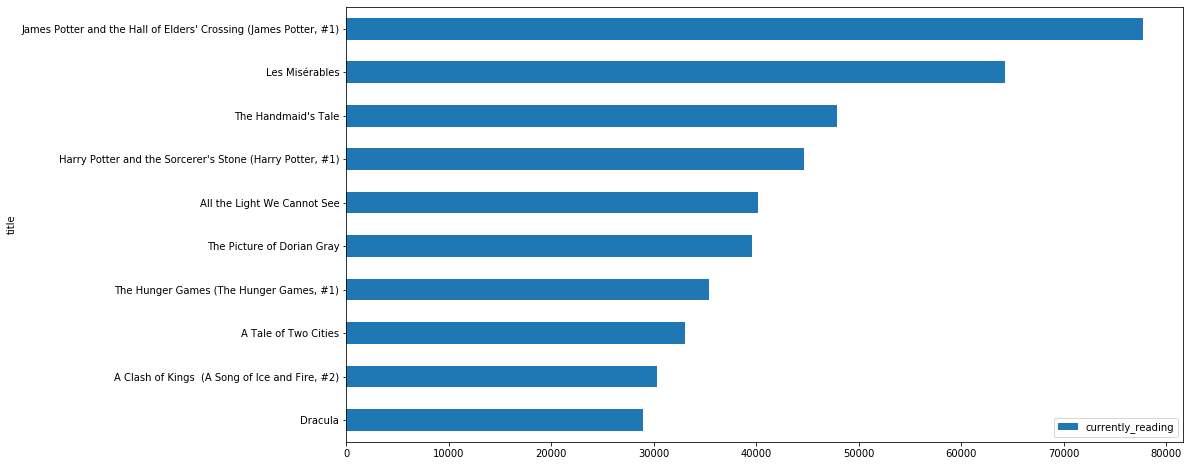

In [40]:
top10_current = top_current.head(10)
ax = top10_current.plot.barh(x='title', y='currently_reading', figsize=(15,8))
ax.invert_yaxis()

### The above are the top 10 books which were currently being read when this data was captured. All the Light We Cannot See is 5th and I personally recommend it :)

In [41]:
genre_year_df = books[['original_publication_year','Genre']]

In [42]:
genre_year = genre_year_df.groupby('original_publication_year')['Genre'].value_counts()